In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
insurance = pd.read_csv("insurance.csv")

In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
insurance['age'][5]

31

In [11]:
insurance['smoker'],insurance['age']

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

#### One hot encoding to turn categorical variable unto numerical variables. Just for a Single column.

In [14]:
pd.get_dummies(insurance['sex'],prefix="sex")

,sex_female,sex_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


#### One hot encoding to turn categorical variable unto numerical variables. For all columns.

In [19]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#### Create X and y values, features and labels. 

#### Create a training set and test set.

#### then build a neural network

In [24]:
X = insurance_one_hot.drop("charges", axis=1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [25]:
y = insurance_one_hot["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Using `scikit learn` for train test split

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [31]:
tf.random.set_seed(42)

In [36]:
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.SGD(),
                       metrics = ["mae"])

insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 [==============================] - 0s 356us/step - loss: 8627.7109 - mae: 8627.7109
Epoch 2/100
34/34 [==============================] - 0s 236us/step - loss: 7879.1143 - mae: 7879.1143
Epoch 3/100
34/34 [==============================] - 0s 287us/step - loss: 7589.4102 - mae: 7589.4102
Epoch 4/100
34/34 [==============================] - 0s 292us/step - loss: 7824.0122 - mae: 7824.0122
Epoch 5/100
34/34 [==============================] - 0s 301us/step - loss: 7657.5898 - mae: 7657.589

34/34 [==============================] - 0s 293us/step - loss: 7337.4204 - mae: 7337.4204
Epoch 72/100
34/34 [==============================] - 0s 579us/step - loss: 7293.1152 - mae: 7293.1152
Epoch 73/100
34/34 [==============================] - 0s 295us/step - loss: 7395.9824 - mae: 7395.9824
Epoch 74/100
34/34 [==============================] - 0s 294us/step - loss: 7450.3657 - mae: 7450.3657
Epoch 75/100
34/34 [==============================] - 0s 298us/step - loss: 7133.6582 - mae: 7133.6582
Epoch 76/100
34/34 [==============================] - 0s 283us/step - loss: 7102.6045 - mae: 7102.6045
Epoch 77/100
34/34 [==============================] - 0s 192us/step - loss: 7320.6416 - mae: 7320.6416
Epoch 78/100
34/34 [==============================] - 0s 293us/step - loss: 7130.8564 - mae: 7130.8564
Epoch 79/100
34/34 [==============================] - 0s 289us/step - loss: 7303.5703 - mae: 7303.5703
Epoch 80/100
34/34 [==============================] - 0s 298us/step - loss: 7065.5020 

##### Check the result of insurance model on test data

In [37]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 0s/step - loss: 8443.0381 - mae: 8443.0381


[8443.0380859375, 8443.0380859375]

In [38]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

#### Right now our model looks like not performaing well. Lets try and improve it.

#### Another `model_2`

In [50]:
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # Added an extra layer
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
## Remember optimizers start with caps
insurance_model_2.compile(loss = tf.keras.losses.mae,
                       #optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                       optimizer = tf.keras.optimizers.SGD(),
                       metrics = ["mae"])

insurance_model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 [==============================] - 0s 354us/step - loss: nan - mae: nan        
Epoch 2/100
34/34 [==============================] - 0s 295us/step - loss: nan - mae: nan
Epoch 3/100
34/34 [==============================] - 0s 293us/step - loss: nan - mae: nan
Epoch 4/100
34/34 [==============================] - 0s 295us/step - loss: nan - mae: nan
Epoch 5/100
34/34 [==============================] - 0s 293us/step - loss: nan - mae: nan
Epoch 6/100
34/34 [==============================]

34/34 [==============================] - 0s 383us/step - loss: nan - mae: nan
Epoch 83/100
34/34 [==============================] - 0s 298us/step - loss: nan - mae: nan
Epoch 84/100
34/34 [==============================] - 0s 291us/step - loss: nan - mae: nan
Epoch 85/100
34/34 [==============================] - 0s 602us/step - loss: nan - mae: nan
Epoch 86/100
34/34 [==============================] - 0s 283us/step - loss: nan - mae: nan
Epoch 87/100
34/34 [==============================] - 0s 293us/step - loss: nan - mae: nan
Epoch 88/100
34/34 [==============================] - 0s 301us/step - loss: nan - mae: nan
Epoch 89/100
34/34 [==============================] - 0s 297us/step - loss: nan - mae: nan
Epoch 90/100
34/34 [==============================] - 0s 286us/step - loss: nan - mae: nan
Epoch 91/100
34/34 [==============================] - 0s 289us/step - loss: nan - mae: nan
Epoch 92/100
34/34 [==============================] - 0s 301us/step - loss: nan - mae: nan
Epoch 93/100

In [51]:
### Adding extra layer gives nan value 

insurance_model_3 = tf.keras.Sequential([
    #tf.keras.layers.Dense(100), # Remove extra layer
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
## Remember optimizers start with caps
insurance_model_3.compile(loss = tf.keras.losses.mae,
                       #optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                       optimizer = tf.keras.optimizers.SGD(),
                       metrics = ["mae"])

insurance_model_3.fit(X_train, y_train, epochs = 100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 [==============================] - 0s 651us/step - loss: 8716.4688 - mae: 8716.4688
Epoch 2/100
34/34 [==============================] - 0s 460us/step - loss: 7883.9180 - mae: 7883.9180
Epoch 3/100
34/34 [==============================] - 0s 0s/step - loss: 7605.7480 - mae: 7605.7480
Epoch 4/100
34/34 [==============================] - 0s 459us/step - loss: 7606.8955 - mae: 7606.8955
Epoch 5/100
34/34 [==============================] - 0s 459us/step - loss: 7703.9536 - mae: 7703.9536
E

34/34 [==============================] - 0s 460us/step - loss: 7284.1431 - mae: 7284.1431
Epoch 74/100
34/34 [==============================] - 0s 0s/step - loss: 7520.9541 - mae: 7520.9541
Epoch 75/100
34/34 [==============================] - 0s 459us/step - loss: 7302.8018 - mae: 7302.8018
Epoch 76/100
34/34 [==============================] - 0s 459us/step - loss: 7100.1821 - mae: 7100.1821
Epoch 77/100
34/34 [==============================] - 0s 459us/step - loss: 7282.4155 - mae: 7282.4155
Epoch 78/100
34/34 [==============================] - 0s 459us/step - loss: 7493.8120 - mae: 7493.8120
Epoch 79/100
34/34 [==============================] - 0s 0s/step - loss: 7399.8237 - mae: 7399.8237
Epoch 80/100
34/34 [==============================] - 0s 191us/step - loss: 7230.1870 - mae: 7230.1870
Epoch 81/100
34/34 [==============================] - 0s 460us/step - loss: 7250.1104 - mae: 7250.1104
Epoch 82/100
34/34 [==============================] - 0s 0s/step - loss: 7161.5640 - mae: 71

In [63]:
### We will add adam for adding extra layers

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # Added an extra layer
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
## Remember optimizers start with caps
insurance_model_4.compile(loss = tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics = ["mae"])

insurance_model_4.fit(X_train, y_train, epochs = 100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 [==============================] - 0s 348us/step - loss: 13309.4980 - mae: 13309.4980
Epoch 2/100
34/34 [==============================] - 0s 291us/step - loss: 13135.5879 - mae: 13135.5879
Epoch 3/100
34/34 [==============================] - 0s 299us/step - loss: 12781.3779 - mae: 12781.3779
Epoch 4/100
34/34 [==============================] - 0s 289us/step - loss: 12094.7891 - mae: 12094.7891
Epoch 5/100
34/34 [==============================] - 0s 299us/step - loss: 10959.2314 - mae:

34/34 [==============================] - 0s 579us/step - loss: 6031.2109 - mae: 6031.2109
Epoch 74/100
34/34 [==============================] - 0s 298us/step - loss: 6001.0474 - mae: 6001.0474
Epoch 75/100
34/34 [==============================] - 0s 585us/step - loss: 5979.3599 - mae: 5979.3599
Epoch 76/100
34/34 [==============================] - 0s 297us/step - loss: 5963.3892 - mae: 5963.3892
Epoch 77/100
34/34 [==============================] - 0s 589us/step - loss: 5932.0864 - mae: 5932.0864
Epoch 78/100
34/34 [==============================] - 0s 286us/step - loss: 5906.1040 - mae: 5906.1040
Epoch 79/100
34/34 [==============================] - 0s 592us/step - loss: 5880.5322 - mae: 5880.5322
Epoch 80/100
34/34 [==============================] - 0s 291us/step - loss: 5851.3862 - mae: 5851.3862
Epoch 81/100
34/34 [==============================] - 0s 598us/step - loss: 5825.0410 - mae: 5825.0410
Epoch 82/100
34/34 [==============================] - 0s 284us/step - loss: 5794.9907 

In [55]:
insurance_model_4.evaluate(X_train,y_train)

34/34 [==============================] - 0s 459us/step - loss: 4903.0669 - mae: 4903.0669


[4903.06689453125, 4903.06689453125]

In [58]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [67]:
## Now we increase the number of epochs

insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_5.compile(loss= tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics=["mae"])

history = insurance_model_5.fit(X_train, y_train, epochs=200)

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 [==============================] - 0s 236us/step - loss: 13272.2881 - mae: 13272.2881
Epoch 2/200
34/34 [==============================] - 0s 0s/step - loss: 13072.9277 - mae: 13072.9277
Epoch 3/200
34/34 [==============================] - 0s 0s/step - loss: 12662.5908 - mae: 12662.5908
Epoch 4/200
34/34 [==============================] - 0s 459us/step - loss: 11889.7139 - mae: 11889.7139
Epoch 5/200
34/34 [==============================] - 0s 459us/step - loss: 10662.4092 - mae: 10662

34/34 [==============================] - 0s 0s/step - loss: 6033.7764 - mae: 6033.7764
Epoch 74/200
34/34 [==============================] - 0s 191us/step - loss: 6004.7275 - mae: 6004.7275
Epoch 75/200
34/34 [==============================] - 0s 460us/step - loss: 5982.8755 - mae: 5982.8755
Epoch 76/200
34/34 [==============================] - 0s 459us/step - loss: 5967.6543 - mae: 5967.6543
Epoch 77/200
34/34 [==============================] - 0s 459us/step - loss: 5934.1958 - mae: 5934.1958
Epoch 78/200
34/34 [==============================] - 0s 459us/step - loss: 5909.3242 - mae: 5909.3242
Epoch 79/200
34/34 [==============================] - 0s 459us/step - loss: 5884.0205 - mae: 5884.0205
Epoch 80/200
34/34 [==============================] - 0s 459us/step - loss: 5854.6230 - mae: 5854.6230
Epoch 81/200
34/34 [==============================] - 0s 191us/step - loss: 5827.6245 - mae: 5827.6245
Epoch 82/200
34/34 [==============================] - 0s 460us/step - loss: 5797.6274 - m

34/34 [==============================] - 0s 459us/step - loss: 3741.1025 - mae: 3741.1025
Epoch 153/200
34/34 [==============================] - 0s 651us/step - loss: 3742.6467 - mae: 3742.6467
Epoch 154/200
34/34 [==============================] - 0s 460us/step - loss: 3735.3145 - mae: 3735.3145
Epoch 155/200
34/34 [==============================] - 0s 459us/step - loss: 3737.7056 - mae: 3737.7056
Epoch 156/200
34/34 [==============================] - 0s 459us/step - loss: 3734.7417 - mae: 3734.7417
Epoch 157/200
34/34 [==============================] - 0s 459us/step - loss: 3730.7812 - mae: 3730.7812
Epoch 158/200
34/34 [==============================] - 0s 459us/step - loss: 3728.2102 - mae: 3728.2102
Epoch 159/200
34/34 [==============================] - 0s 459us/step - loss: 3724.4158 - mae: 3724.4158
Epoch 160/200
34/34 [==============================] - 0s 191us/step - loss: 3731.6577 - mae: 3731.6577
Epoch 161/200
34/34 [==============================] - 0s 460us/step - loss: 3

In [68]:
insurance_model_5.evaluate(X_train, y_train)

34/34 [==============================] - 0s 0s/step - loss: 3663.2419 - mae: 3663.2419


[3663.241943359375, 3663.241943359375]

In [69]:
insurance_model_5.evaluate(X_test, y_test)

9/9 [==============================] - 0s 0s/step - loss: 3488.1292 - mae: 3488.1292


[3488.129150390625, 3488.129150390625]

Text(0, 0.5, 'loss')

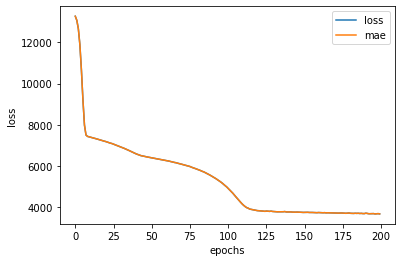

In [70]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

##### Tensorflow early stopping callback, which is a tensorflow component that stops training once model stops improving.
##### https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
##### https://keras.io/api/callbacks/early_stopping/

In [73]:
## patience means number of epochs with no improvements and monitor: Quantity to be monitored.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
insurance_model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_6.compile(loss= tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics=["mae"])

history_2 = insurance_model_6.fit(X_train, y_train, epochs=200,callbacks=[callback])


Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 [==============================] - 0s 530us/step - loss: 13302.8496 - mae: 13302.8496
Epoch 2/200
34/34 [==============================] - 0s 460us/step - loss: 13137.6465 - mae: 13137.6465
Epoch 3/200
34/34 [==============================] - 0s 0s/step - loss: 12801.3154 - mae: 12801.3154
Epoch 4/200
34/34 [==============================] - 0s 0s/step - loss: 12138.6543 - mae: 12138.6543
Epoch 5/200
34/34 [==============================] - 0s 0s/step - loss: 11018.4424 - mae: 11018.44

34/34 [==============================] - 0s 459us/step - loss: 6036.3970 - mae: 6036.3970
Epoch 74/200
34/34 [==============================] - 0s 651us/step - loss: 6006.6050 - mae: 6006.6050
Epoch 75/200
34/34 [==============================] - 0s 460us/step - loss: 5984.5986 - mae: 5984.5986
Epoch 76/200
34/34 [==============================] - 0s 459us/step - loss: 5969.8970 - mae: 5969.8970
Epoch 77/200
34/34 [==============================] - 0s 459us/step - loss: 5937.5210 - mae: 5937.5210
Epoch 78/200
34/34 [==============================] - 0s 459us/step - loss: 5913.1470 - mae: 5913.1470
Epoch 79/200
34/34 [==============================] - 0s 459us/step - loss: 5888.2505 - mae: 5888.2505
Epoch 80/200
34/34 [==============================] - 0s 459us/step - loss: 5859.0576 - mae: 5859.0576
Epoch 81/200
34/34 [==============================] - 0s 0s/step - loss: 5832.7612 - mae: 5832.7612
Epoch 82/200
34/34 [==============================] - 0s 0s/step - loss: 5803.1670 - mae:

Text(0, 0.5, 'loss')

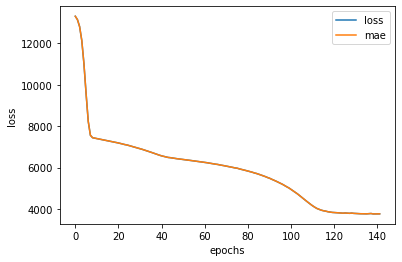

In [75]:
# Model ran til 142 epochs and stopped automatically as there was no improvement
pd.DataFrame(history_2.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

## Preprocessing Data. Normalization and Standardisation.

<AxesSubplot:ylabel='Frequency'>

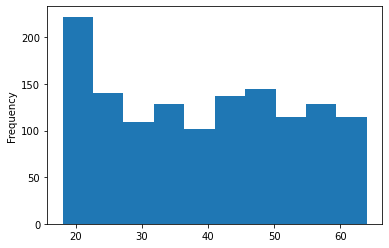

In [77]:
X['age'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

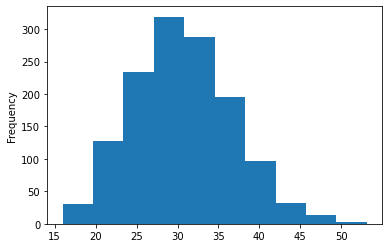

In [78]:
X['bmi'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

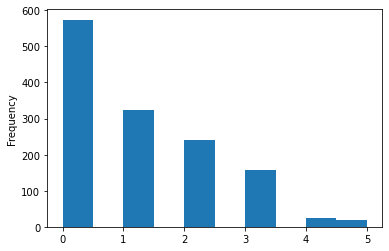

In [79]:
X['children'].plot(kind="hist")

In [82]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [83]:
insurance = pd.read_csv("insurance.csv")

In [84]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### import proper sklearn classes for standardisation

In [87]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [92]:
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']), #turn all values in this column between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["smoker","sex","region"]) #ignore columns that one hot encoder doesnt know
)

#Create our X and y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Build our train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

#Fit the column transformer to our training data
ct.fit(X_train)
#Transform training and test data with normalization(MinMaxScaler) and OneHot Encoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [98]:
#### What our data looked like before

In [99]:
X_train.loc[1]

age                18
sex              male
bmi             33.77
children            1
smoker             no
region      southeast
Name: 1, dtype: object

In [ ]:
#### What does our data looks like now

In [102]:
X_train_normal[0] #here you cannot access like X_train.loc[1]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [103]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [106]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [118]:
#### Now the data is normalized and One hot encoded. Now lets build our model.
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss= tf.keras.losses.mae,
                         #optimizer=tf.keras.optimizers.SGD(),
                          optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

insurance_model_4.fit(X_train_normal, y_train, epochs=500) ## We put new data here

Epoch 1/500
34/34 [==============================] - 0s 531us/step - loss: 13342.8506 - mae: 13342.8506
Epoch 2/500
34/34 [==============================] - 0s 460us/step - loss: 13333.7686 - mae: 13333.7686
Epoch 3/500
34/34 [==============================] - 0s 459us/step - loss: 13312.5342 - mae: 13312.5342
Epoch 4/500
34/34 [==============================] - 0s 459us/step - loss: 13268.8975 - mae: 13268.8975
Epoch 5/500
34/34 [==============================] - 0s 459us/step - loss: 13191.5244 - mae: 13191.5244
Epoch 6/500
34/34 [==============================] - 0s 0s/step - loss: 13069.2363 - mae: 13069.2363
Epoch 7/500
34/34 [==============================] - 0s 0s/step - loss: 12891.7236 - mae: 12891.7236
Epoch 8/500
34/34 [==============================] - 0s 191us/step - loss: 12648.8340 - mae: 12648.8340
Epoch 9/500
34/34 [==============================] - 0s 460us/step - loss: 12330.3096 - mae: 12330.3096
Epoch 10/500
34/34 [==============================] - 0s 459us/step - 

34/34 [==============================] - 0s 460us/step - loss: 3682.9065 - mae: 3682.9065
Epoch 81/500
34/34 [==============================] - 0s 459us/step - loss: 3676.7500 - mae: 3676.7500
Epoch 82/500
34/34 [==============================] - 0s 0s/step - loss: 3673.4827 - mae: 3673.4827
Epoch 83/500
34/34 [==============================] - 0s 0s/step - loss: 3667.5503 - mae: 3667.5503
Epoch 84/500
34/34 [==============================] - 0s 0s/step - loss: 3664.4333 - mae: 3664.4333
Epoch 85/500
34/34 [==============================] - 0s 0s/step - loss: 3661.6331 - mae: 3661.6331
Epoch 86/500
34/34 [==============================] - 0s 191us/step - loss: 3660.1865 - mae: 3660.1865
Epoch 87/500
34/34 [==============================] - 0s 460us/step - loss: 3657.1775 - mae: 3657.1775
Epoch 88/500
34/34 [==============================] - 0s 459us/step - loss: 3654.7153 - mae: 3654.7153
Epoch 89/500
34/34 [==============================] - 0s 459us/step - loss: 3653.2825 - mae: 3653.

34/34 [==============================] - 0s 460us/step - loss: 3532.3057 - mae: 3532.3057
Epoch 160/500
34/34 [==============================] - 0s 459us/step - loss: 3532.0557 - mae: 3532.0557
Epoch 161/500
34/34 [==============================] - 0s 459us/step - loss: 3529.0830 - mae: 3529.0830
Epoch 162/500
34/34 [==============================] - 0s 459us/step - loss: 3528.3975 - mae: 3528.3975
Epoch 163/500
34/34 [==============================] - 0s 459us/step - loss: 3526.4636 - mae: 3526.4636
Epoch 164/500
34/34 [==============================] - 0s 459us/step - loss: 3525.9783 - mae: 3525.9783
Epoch 165/500
34/34 [==============================] - 0s 0s/step - loss: 3523.8193 - mae: 3523.8193
Epoch 166/500
34/34 [==============================] - 0s 460us/step - loss: 3522.0894 - mae: 3522.0894
Epoch 167/500
34/34 [==============================] - 0s 459us/step - loss: 3521.1821 - mae: 3521.1821
Epoch 168/500
34/34 [==============================] - 0s 459us/step - loss: 3520

34/34 [==============================] - 0s 460us/step - loss: 3473.1526 - mae: 3473.1526
Epoch 239/500
34/34 [==============================] - 0s 459us/step - loss: 3475.0596 - mae: 3475.0596
Epoch 240/500
34/34 [==============================] - 0s 459us/step - loss: 3472.5417 - mae: 3472.5417
Epoch 241/500
34/34 [==============================] - 0s 459us/step - loss: 3471.6929 - mae: 3471.6929
Epoch 242/500
34/34 [==============================] - 0s 459us/step - loss: 3473.8628 - mae: 3473.8628
Epoch 243/500
34/34 [==============================] - 0s 651us/step - loss: 3472.3508 - mae: 3472.3508
Epoch 244/500
34/34 [==============================] - 0s 460us/step - loss: 3473.7095 - mae: 3473.7095
Epoch 245/500
34/34 [==============================] - 0s 459us/step - loss: 3472.0029 - mae: 3472.0029
Epoch 246/500
34/34 [==============================] - 0s 459us/step - loss: 3473.5842 - mae: 3473.5842
Epoch 247/500
34/34 [==============================] - 0s 459us/step - loss: 3

Epoch 317/500
34/34 [==============================] - 0s 459us/step - loss: 3473.3406 - mae: 3473.3406
Epoch 318/500
34/34 [==============================] - 0s 0s/step - loss: 3473.3069 - mae: 3473.3069
Epoch 319/500
34/34 [==============================] - 0s 0s/step - loss: 3472.8479 - mae: 3472.8479
Epoch 320/500
34/34 [==============================] - 0s 0s/step - loss: 3471.7134 - mae: 3471.7134
Epoch 321/500
34/34 [==============================] - 0s 0s/step - loss: 3472.5842 - mae: 3472.5842
Epoch 322/500
34/34 [==============================] - 0s 191us/step - loss: 3473.4214 - mae: 3473.4214
Epoch 323/500
34/34 [==============================] - 0s 460us/step - loss: 3472.1458 - mae: 3472.1458
Epoch 324/500
34/34 [==============================] - 0s 459us/step - loss: 3472.1655 - mae: 3472.1655
Epoch 325/500
34/34 [==============================] - 0s 459us/step - loss: 3472.5264 - mae: 3472.5264
Epoch 326/500
34/34 [==============================] - 0s 459us/step - loss:

34/34 [==============================] - 0s 0s/step - loss: 3473.3735 - mae: 3473.3735
Epoch 397/500
34/34 [==============================] - 0s 0s/step - loss: 3473.1318 - mae: 3473.1318
Epoch 398/500
34/34 [==============================] - 0s 0s/step - loss: 3471.8794 - mae: 3471.8794
Epoch 399/500
34/34 [==============================] - 0s 0s/step - loss: 3473.8762 - mae: 3473.8762
Epoch 400/500
34/34 [==============================] - 0s 651us/step - loss: 3473.5881 - mae: 3473.5881
Epoch 401/500
34/34 [==============================] - 0s 460us/step - loss: 3471.8628 - mae: 3471.8628
Epoch 402/500
34/34 [==============================] - 0s 459us/step - loss: 3472.8113 - mae: 3472.8113
Epoch 403/500
34/34 [==============================] - 0s 459us/step - loss: 3472.7385 - mae: 3472.7385
Epoch 404/500
34/34 [==============================] - 0s 459us/step - loss: 3471.4646 - mae: 3471.4646
Epoch 405/500
34/34 [==============================] - 0s 459us/step - loss: 3472.7356 - m

34/34 [==============================] - 0s 459us/step - loss: 3473.3750 - mae: 3473.3750
Epoch 476/500
34/34 [==============================] - 0s 459us/step - loss: 3472.1262 - mae: 3472.1262
Epoch 477/500
34/34 [==============================] - 0s 459us/step - loss: 3474.0190 - mae: 3474.0190
Epoch 478/500
34/34 [==============================] - 0s 651us/step - loss: 3471.9443 - mae: 3471.9443
Epoch 479/500
34/34 [==============================] - 0s 460us/step - loss: 3473.4634 - mae: 3473.4634
Epoch 480/500
34/34 [==============================] - 0s 459us/step - loss: 3472.4573 - mae: 3472.4573
Epoch 481/500
34/34 [==============================] - 0s 459us/step - loss: 3472.5947 - mae: 3472.5947
Epoch 482/500
34/34 [==============================] - 0s 459us/step - loss: 3473.4050 - mae: 3473.4050
Epoch 483/500
34/34 [==============================] - 0s 459us/step - loss: 3473.1221 - mae: 3473.1221
Epoch 484/500
34/34 [==============================] - 0s 0s/step - loss: 3472

In [119]:
insurance_model_4.evaluate(X_train_normal,y_train)

34/34 [==============================] - 0s 0s/step - loss: 3471.4602 - mae: 3471.4602


[3471.460205078125, 3471.460205078125]

In [120]:
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 0s/step - loss: 3161.0383 - mae: 3161.0383


[3161.038330078125, 3161.038330078125]